# Intro to `pandas`

We'll explore the Pandas package for simple data handling tasks using geoscience data examples. 

## Basic Pandas

Introduces the concept of a `DataFrame` in Python. If you're familiar with R, it's pretty much the same idea! Useful cheat sheet [here](https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.59HV6BY)

The main purpose of Pandas is to allow easy manipulation of data in tabular form. Perhaps the most important idea that makes Pandas great for data science, is that it will always preserve **alignment** between data and labels.

In [1]:
import pandas as pd

The most common data structure in Pandas is the `DataFrame`. A 2D structure that can hold various types of Python objects indexed by an `index` array (or multiple `index` arrays). Columns are usually labelled as well using strings.

An easy way to think about a `DataFrame` is if you imagine it as an Excel spreadsheet.

Let's define one using a small dataset:

In [2]:
data =  [[2.13, 'sandstone'],
         [3.45, 'limestone'],
         [2.45, 'shale']]
data

[[2.13, 'sandstone'], [3.45, 'limestone'], [2.45, 'shale']]

Make a `DataFrame` from `data`

In [3]:
df = pd.DataFrame(data, columns=['velocity', 'lithology'])
df

,velocity,lithology
0,2.13,sandstone
1,3.45,limestone
2,2.45,shale


Accessing the data is a bit more complex than in the numpy array cases but for good reasons

In [4]:
df['id'] = [101, 102, 103]
df = df.set_index('id')
df.head()

,velocity,lithology
id,,
101,2.13,sandstone
102,3.45,limestone
103,2.45,shale


In [5]:
df.loc[101:102]  # Inlusive slice, unlike anything else in Python or NumPy

,velocity,lithology
id,,
101,2.13,sandstone
102,3.45,limestone


In [6]:
df.iloc[0:1]  # Works like NumPy

,velocity,lithology
id,,
101,2.13,sandstone


In [7]:
df['lithology']

id
101    sandstone
102    limestone
103        shale
Name: lithology, dtype: object

In [8]:
df.loc[0]

KeyError: 0

In [9]:
df.loc[df['velocity'] < 3]

,velocity,lithology
id,,
101,2.13,sandstone
103,2.45,shale


In [50]:
df.loc[df['velocity'] < 3, 'lithology']


id
101    sandstone
103        shale
Name: lithology, dtype: object

## Adding data

Add more data (row wise)

In [51]:
df.loc[99] = [3.5, 'dolomite']

In [52]:
df.loc[3] = [2.6, 'shale']
df

,velocity,lithology
id,,
101,2.13,sandstone
102,3.45,limestone
103,2.45,shale
99,3.50,dolomite
3,2.60,shale


Add a new column with a "complete" list, array or series

In [53]:
df['new_column'] = ["x", "y", "z", "a", "b"]
df

,velocity,lithology,new_column
id,,,
101,2.13,sandstone,x
102,3.45,limestone,y
103,2.45,shale,z
99,3.50,dolomite,a
3,2.60,shale,b


## Reading a CSV

Pandas also reads files from disk in tabular form ([here](http://pandas.pydata.org/pandas-docs/version/0.20/io.html)'s a list of all the formats that it can read and write). A very common one is CSV, so let's load one!

The data is the same as used in this study: http://www.kgs.ku.edu/PRS/publication/2003/ofr2003-30/index.html

From that poster:

> The Panoma Field (2.9 TCF gas) produces from Permian Council Grove Group marine carbonates and nonmarine silicilastics in the Hugoton embayment of the Anadarko Basin. It and the Hugoton Field, which has produced from the Chase Group since 1928, the top of which is 300 feet shallower have combined to produce 27 TCF gas, making it the largest gas producing area in North America. Both fields are stratigraphic traps with their updip west and northwest limits nearly coincident. Maximum recoveries in the Panoma are attained west of center of the field. Deeper production includes oil and gas from Pennsylvanian Lansing-Kansas City, Marmaton, and Morrow and the Mississippian.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/Panoma_Field_Permian.csv")
df.head()

,Well Name,Formation,Depth,GR,DeltaPHI,PHIND,ILD,PE,Marine,RelPos,Facies
0,SHRIMPLIN,A1 SH,2793.0,77.45,9.9,11.915,21.281390,4.6,0,1.000,3
1,SHRIMPLIN,A1 SH,2793.5,78.26,14.2,12.565,20.989399,4.1,0,0.979,3
2,SHRIMPLIN,A1 SH,2794.0,79.05,14.8,13.050,20.701413,3.6,0,0.957,3
3,SHRIMPLIN,A1 SH,2794.5,86.10,13.9,13.115,20.417379,3.5,0,0.936,3
4,SHRIMPLIN,A1 SH,2795.0,74.58,13.5,13.300,19.678863,3.4,0,0.915,3


We have some well logs, plus...

> Two other feature elements derived from other geologic data are geologic constraining variables (GCV), nonmarine-marine (NM-M) and relative position (RPos). NM-M is determined from formation tops and bases and RPos is the position of a particular sample with respect to the base of its respective nonmarine or marine interval. These two important variables help to incorporate geologic knowledge into the variable mix.

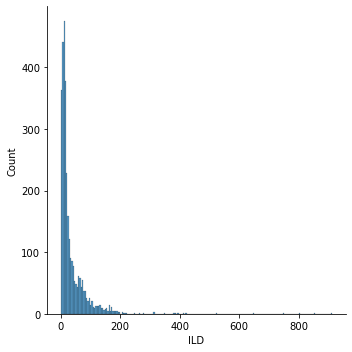

In [4]:
import seaborn as sns
import numpy as np

sns.displot(df['ILD'])

### Exercise

- Create a new column called `ILD_log10` and store in it the log<sub>10</sub> of the values in column `ILD`.
- Make a 'displot' of the new column.
- Check the Pandas documentation [here](http://pandas.pydata.org/pandas-docs/version/0.22/api.html#data-manipulations) and look for a way to determine how many different facies are part of the `DataFrame`.

In [5]:
import numpy as np

df['ILD_log10'] = np.log10(df["ILD"])

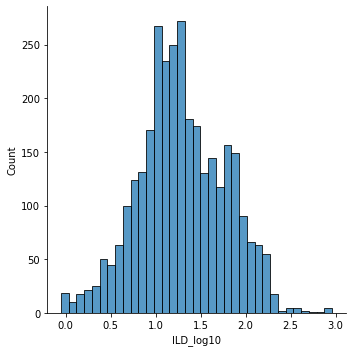

In [6]:
sns.displot(df['ILD_log10'])

In [7]:
df.groupby('Facies').size()

Facies
1    259
2    738
3    615
4    184
5    217
6    462
7     98
8    498
9     93
dtype: int64

# Inspecting the `DataFrame`

Using the `DataFrame` with well log information loaded before, we can make a summary using the `describe()` method of the `DataFrame` object

In [8]:
df.describe()

,Depth,GR,DeltaPHI,PHIND,ILD,PE,Marine,RelPos,Facies,ILD_log10
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,2872.331226,66.596186,3.605271,13.489657,35.961307,3.687710,0.487674,0.521835,4.323641,1.288656
std,129.957200,30.677758,5.271850,7.756242,55.322542,0.859788,0.499927,0.287663,2.438403,0.480737
min,2573.500000,13.250000,-21.832000,0.550000,0.887364,0.200000,0.000000,0.010000,1.000000,-0.051898
25%,2787.000000,48.431000,1.200000,8.308000,9.682779,3.100000,0.000000,0.275750,2.000000,0.986000
50%,2889.500000,66.255000,3.600000,12.117500,17.712595,3.500000,0.000000,0.528000,3.000000,1.248282
75%,2975.500000,79.894500,6.504250,16.415000,42.461956,4.277000,1.000000,0.772000,6.000000,1.628000
max,3122.500000,361.150000,18.600000,84.400000,912.010839,8.094000,1.000000,1.000000,9.000000,2.960000


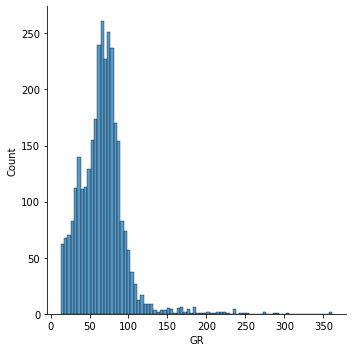

In [9]:
sns.displot(df'[GR]')

In [10]:
df['GR'] = df['GR'].clip(upper=200)

## Better descriptions

We can define a Python dictionary to relate facies with the integer label on the `DataFrame`

In [11]:
lithofacies = {1:'sandstone', 2:'c_siltstone', 3:'f_siltstone', 4:'marine_silt_shale',
               5:'mudstone', 6:'wackestone', 7:'dolomite', 8:'packstone', 9:'bafflestone'}

Let's add a new column with the name version of the facies. There is a `replace()` method on DataFrames and Series, and it takes a dictionary for what to replace with what. So we could also achieve the same thing by passing our dictionary to that.

In [12]:
df["Lithofacies"] = df["Facies"].replace(lithofacies)

In [13]:
df.head()

,Well Name,Formation,Depth,GR,DeltaPHI,PHIND,ILD,PE,Marine,RelPos,Facies,ILD_log10,Lithofacies
0,SHRIMPLIN,A1 SH,2793.0,77.45,9.9,11.915,21.281390,4.6,0,1.000,3,1.328,f_siltstone
1,SHRIMPLIN,A1 SH,2793.5,78.26,14.2,12.565,20.989399,4.1,0,0.979,3,1.322,f_siltstone
2,SHRIMPLIN,A1 SH,2794.0,79.05,14.8,13.050,20.701413,3.6,0,0.957,3,1.316,f_siltstone
3,SHRIMPLIN,A1 SH,2794.5,86.10,13.9,13.115,20.417379,3.5,0,0.936,3,1.310,f_siltstone
4,SHRIMPLIN,A1 SH,2795.0,74.58,13.5,13.300,19.678863,3.4,0,0.915,3,1.294,f_siltstone


## Adding more data to the `DataFrame`

We'd like to augment the DataFrame with some new data, based on some of the existing data.

In [14]:
def calc_phi_rhob(phind, deltaphi):
    """
    Compute phi_RHOB from phi_ND and delta-phi.
    """
    return 2 * (phind/100) / (1 - deltaphi/100) - deltaphi/100

In [15]:
def calc_rhob(phi_rhob, matrix='sandstone', fluid='brine'):
    """
    Computes RHOB from phi_RHOB using some typical values for rho_matrix,
    and rho_fluid. See wiki.aapg.org/Density-neutron_log_porosity
    """
    matrixes = {
        'mudstone':   2350,
        'siltstone':  2550,
        'sandstone':  2650,
        'limestone':  2710,
        'dolomite':   2880,
        'anyhydrite': 2980,
        'salt':       2030,
    }

    fluids = {
        'water':       1000,
        'brine':       1100,
        'heavy oil':   1000,
        'light oil':    800,
        'lng':          650,
    }
    
    rho_matrix = matrixes.get(matrix.lower(), 2650)
    rho_fluid = fluids.get(fluid.lower(), 1100)
    return rho_matrix * (1 - phi_rhob) + rho_fluid * phi_rhob

### Exercise

- Create a new column called `RHOB` and use the functions `calc_phi_rhob` and `calc_rhob` with the appropriate arguments to produce to fill its values. Assume everything is sandstone.
- Check the distribution of the new RHOB values. Sedimentary rocks usually have densities in the range 2000 to 2500 kg/m³. Some of these seem rather small. Use `df.loc[...]` (with a condition in place of the ellipsis) to make a copy of the DataFrame that only includes the values above some reasonable number, maybe 1500 kg/m³.
- **Stretch goal:** create a function that processes a row, taking `row` as its only argument. Then use `row['Facies']` to get the matrix (the geological one!) and use that to make the calculation for each row, returning it. Then you can use `df.apply()` with `axis=1` to apply your function to every row and make a new column. Use this dictionary to look up the matrix type:

In [16]:
lithologies = {1:'sandstone',
               2:'siltstone', 3:'siltstone',
               4:'mudstone', 5:'mudstone',
               6:'wackestone',
               7:'dolomite',
               8:'limestone', 9:'limestone',
              }

In [17]:
# YOUR CODE HERE



In [18]:
phi_rhob = calc_phi_rhob(df['PHIND'], df['DeltaPHI'])
df['RHOB'] = calc_rhob(phi_rhob)

In [19]:
def get_rhob(row):
    phi_rhob = calc_phi_rhob(row['PHIND'], row['DeltaPHI'])  # Just like before.
    matrix = lithologies.get(row['Facies'], 'sandstone')     # This time use matrix.
    return calc_rhob(phi_rhob, matrix=matrix)

df['RHOB'] = df.apply(get_rhob, axis=1)

In [20]:
df.describe()

,Depth,GR,DeltaPHI,PHIND,ILD,PE,Marine,RelPos,Facies,ILD_log10,RHOB
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,2872.331226,66.216568,3.605271,13.489657,35.961307,3.687710,0.487674,0.521835,4.323641,1.288656,2227.329965
std,129.957200,28.403328,5.271850,7.756242,55.322542,0.859788,0.499927,0.287663,2.438403,0.480737,266.410071
min,2573.500000,13.250000,-21.832000,0.550000,0.887364,0.200000,0.000000,0.010000,1.000000,-0.051898,81.448980
25%,2787.000000,48.431000,1.200000,8.308000,9.682779,3.100000,0.000000,0.275750,2.000000,0.986000,2127.366399
50%,2889.500000,66.255000,3.600000,12.117500,17.712595,3.500000,0.000000,0.528000,3.000000,1.248282,2250.123933
75%,2975.500000,79.894500,6.504250,16.415000,42.461956,4.277000,1.000000,0.772000,6.000000,1.628000,2406.903229
max,3122.500000,200.000000,18.600000,84.400000,912.010839,8.094000,1.000000,1.000000,9.000000,2.960000,2868.788740


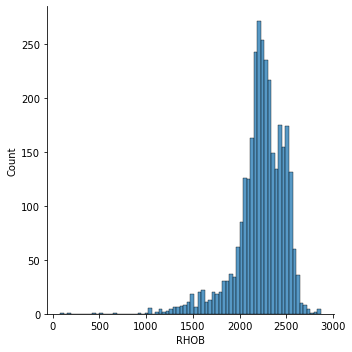

In [21]:
sns.displot(df['RHOB'])

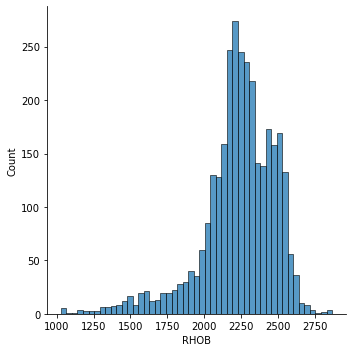

In [22]:
sns.displot(df['RHOB'].loc[df['RHOB'] > 1000])

In [23]:
df = df.loc[df['RHOB'] > 1000]

In [24]:
df['RHOB'] = df['RHOB'].clip(lower=1500)

## Visual exploration of the data

Pandas has a `scatter_matrix()` function, but it's not that pretty.

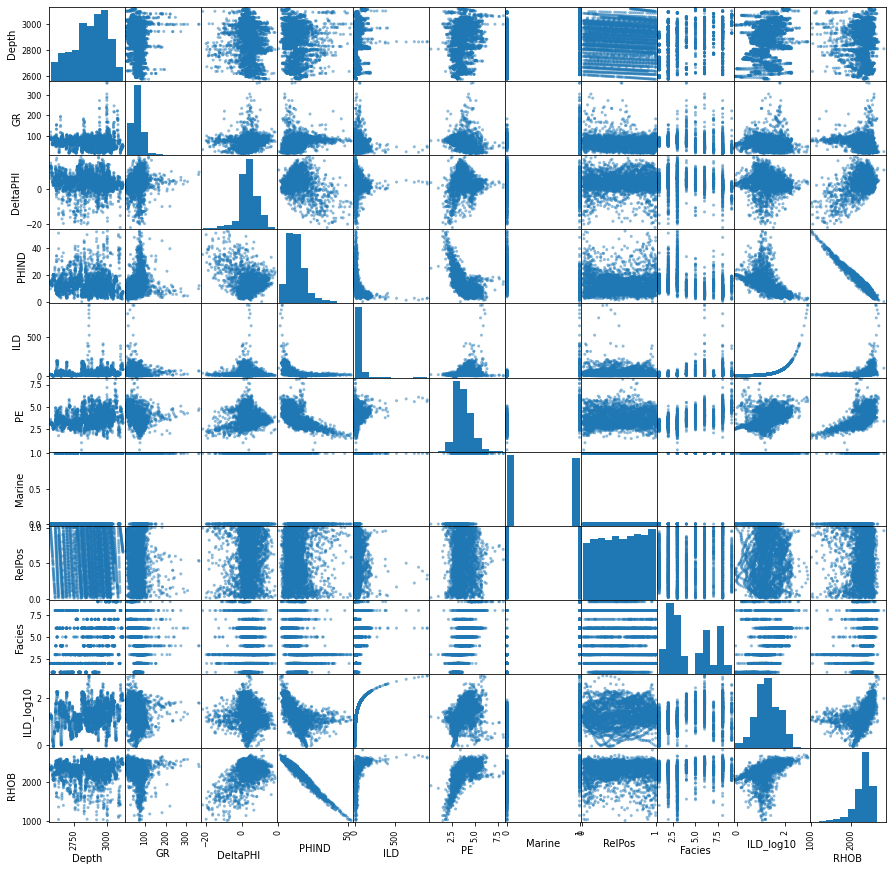

In [20]:
_ = pd.plotting.scatter_matrix(df, figsize=(15,15))

We can better visualize the properties of each facies and how they compare using Seaborn's `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

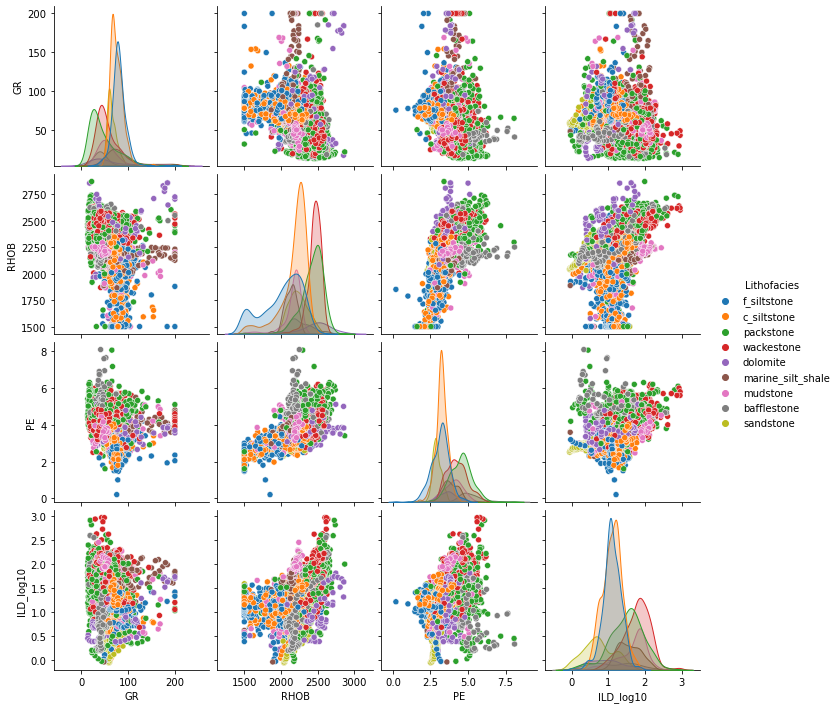

In [25]:
sns.pairplot(df,
             hue="Lithofacies",
             vars=['GR','RHOB','PE','ILD_log10'])

We can have a lot of control over all of the elements in the pair-plot by using the `PairGrid` object.

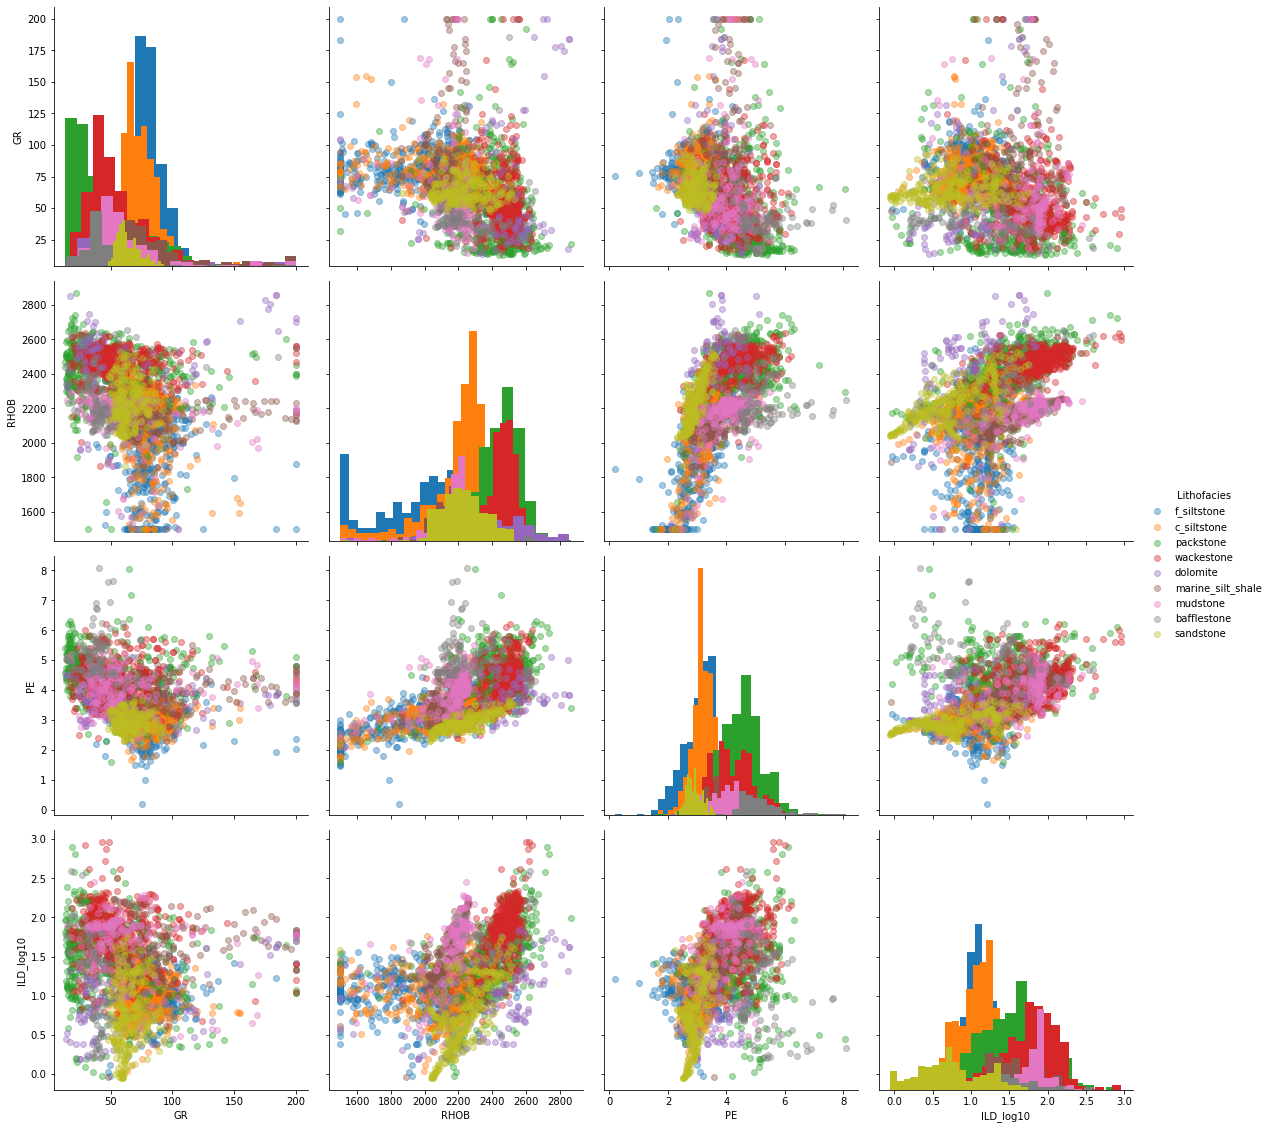

In [26]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df, hue="Lithofacies", vars=['GR','RHOB','PE','ILD_log10'], height=4)

g.map_upper(plt.scatter, alpha=0.4)  
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)  
g.add_legend()

It is very clear that it's hard to separate these facies in feature space. Let's simplify a bit:

In [27]:
df["Lithology"] = df["Facies"].replace(lithologies)

In [28]:
mineralogy = {
     1:'siliciclastic',
     2:'siliciclastic', 3:'siliciclastic',
     4:'siliciclastic', 5:'siliciclastic',
     6:'carbonate',
     7:'carbonate',
     8:'carbonate', 9:'carbonate',
}

In [29]:
df["Mineralogy"] = df["Facies"].map(mineralogy)

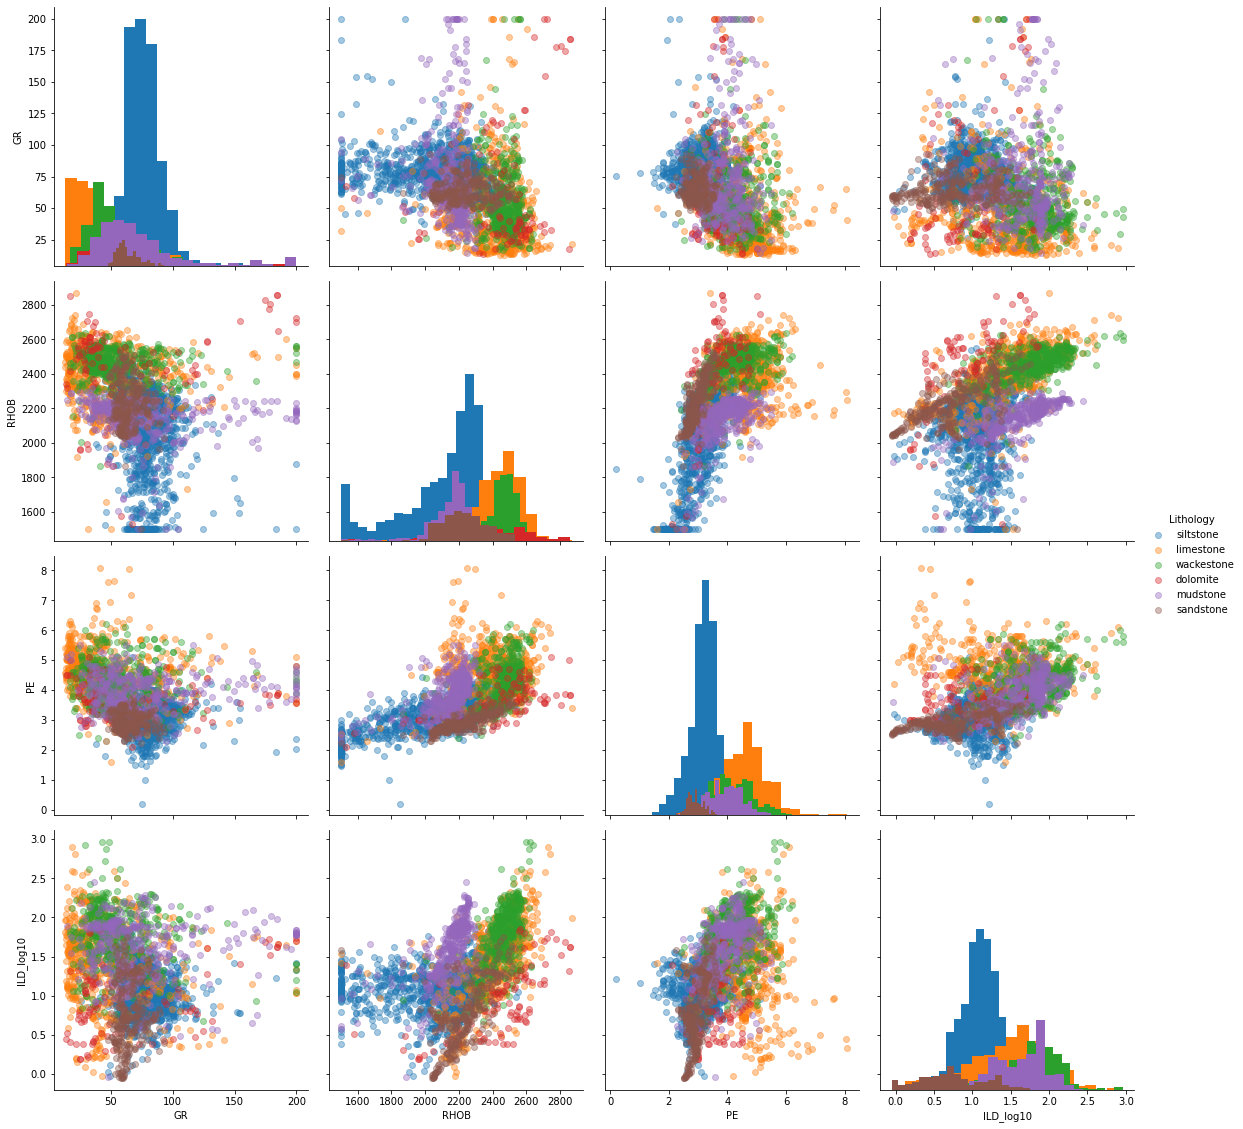

In [30]:
g = sns.PairGrid(df, hue="Lithology", vars=['GR','RHOB','PE','ILD_log10'], height=4)  
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)
g.add_legend()

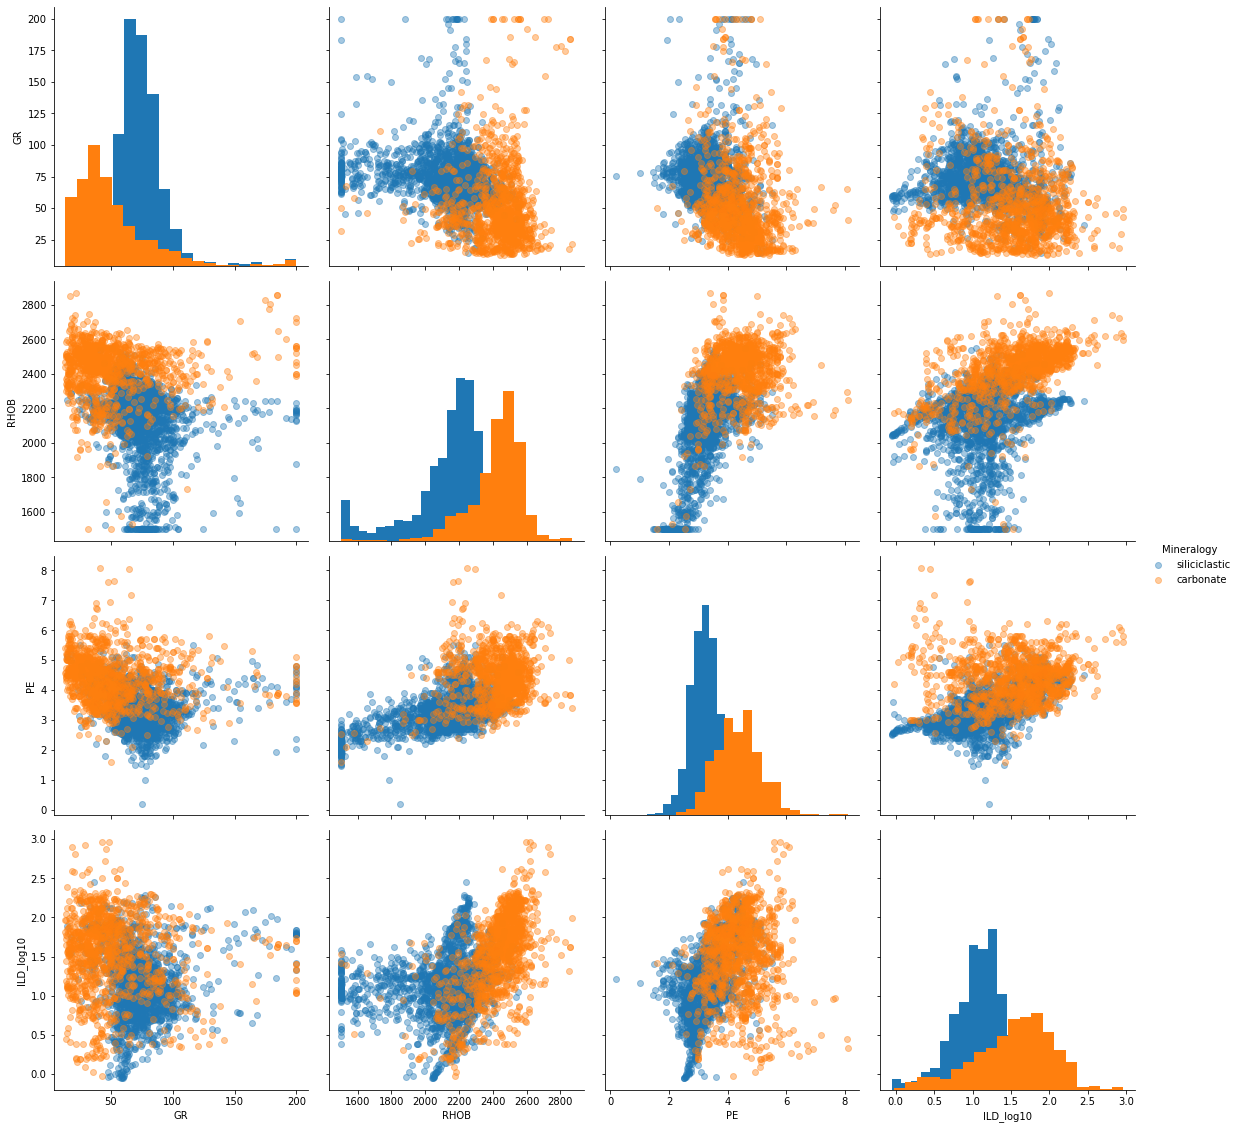

In [33]:
g = sns.PairGrid(df, hue="Mineralogy", vars=['GR','RHOB','PE','ILD_log10'], height=4)  
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)
g.add_legend()

In [31]:
df.head()

,Well Name,Formation,Depth,GR,DeltaPHI,PHIND,ILD,PE,Marine,RelPos,Facies,ILD_log10,Lithofacies,RHOB,Lithology,Mineralogy
0,SHRIMPLIN,A1 SH,2793.0,77.45,9.9,11.915,21.281390,4.6,0,1.000,3,1.328,f_siltstone,2310.048335,siltstone,siliciclastic
1,SHRIMPLIN,A1 SH,2793.5,78.26,14.2,12.565,20.989399,4.1,0,0.979,3,1.322,f_siltstone,2331.208858,siltstone,siliciclastic
2,SHRIMPLIN,A1 SH,2794.0,79.05,14.8,13.050,20.701413,3.6,0,0.957,3,1.316,f_siltstone,2320.409859,siltstone,siliciclastic
3,SHRIMPLIN,A1 SH,2794.5,86.10,13.9,13.115,20.417379,3.5,0,0.936,3,1.310,f_siltstone,2309.813647,siltstone,siliciclastic
4,SHRIMPLIN,A1 SH,2795.0,74.58,13.5,13.300,19.678863,3.4,0,0.915,3,1.294,f_siltstone,2299.854046,siltstone,siliciclastic


In [32]:
df.to_csv("../data/training_data.csv", index=False)

<hr />

<p style="color:gray">©2020 Agile Geoscience. Licensed CC-BY.</p>